In [113]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [114]:
File_path = "data/Logistic_reg_data.csv"

df = pd.read_csv(File_path)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [115]:
df.shape

(41188, 21)

Check for null values 

In [116]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

No null values found in the dataset

Check the unique values in the education coloumn 

In [117]:
df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

Grouping the basic inputs to basic

In [118]:
df['education'] = df['education'].replace(['basic.9y', 'basic.6y', 'basic.4y'], 'Basic')


In [119]:
df['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

The grouping as worked and now we have basic representing them. Grouping similar categories together simplifies the data and for better modelling.

#### Data exploration

Getting the unique value count of the dependent variable

In [120]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

C:\Users\Eric\AppData\Local\Temp\ipykernel_17712\3005131546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='hls')


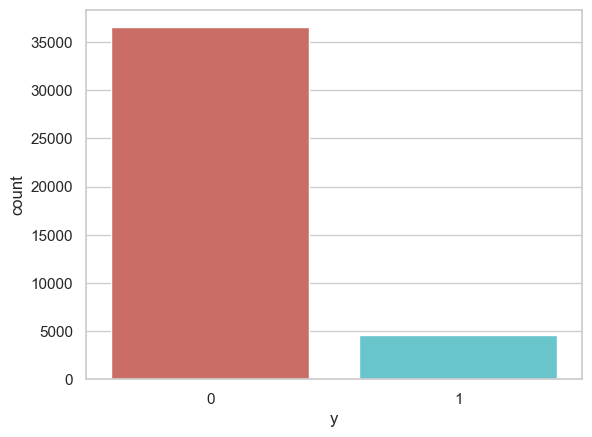

In [121]:

sns.countplot(x='y', data=df, palette='hls')
plt.show()

The above indicates that target variable y is highly imbalanced. Imbalanced datasets can be problematic to the model the model might become biased towards predicting the majority class 0, because it has many more examples to learn from and also misleading accuracy. 

Getting the percentage of the when the case is '0'

In [122]:
df[df['y']==0].shape[0]/df.shape[0]

0.8873458288821987

In [124]:
df.groupby(['education','y']).mean(numeric_only=True)

age    duration  campaign       pdays  previous  \
education           y                                                          
Basic               0  41.726453  228.103641  2.604867  987.968312  0.117034   
                    1  46.752984  629.579431  2.083563  837.555556  0.393021   
high.school         0  38.058345  222.932933  2.635549  984.135431  0.152405   
                    1  37.503395  573.205626  2.017459  801.614937  0.461688   
illiterate          0  47.571429  243.071429  2.357143  999.000000  0.071429   
                    1  51.750000  394.750000  2.000000  750.750000  0.250000   
professional.course 0  39.958262  215.589716  2.657272  985.117040  0.118546   
                    1  41.031933  541.132773  2.030252  770.541176  0.510924   
university.degree   0  38.916460  213.126119  2.643170  979.791675  0.138217   
                    1  38.644910  505.283832  2.062874  775.894012  0.532934   
unknown             0  43.356081  223.888514  2.691892  981.605405  0.138514   
                    1  44.219124  489.414343  2.031873  714.199203  0.745020   

                       emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
education           y                                                           
Basic               0      0.300123       93.662898     -40.998092   3.852892   
                    1     -0.949954       93.399021     -40.188062   2.436839   
high.school         0      0.181388       93.611098     -41.051933   3.724866   
                    1     -1.188652       93.368916     -40.024830   2.167868   
illiterate          0      0.378571       93.502500     -40.514286   4.006786   
                    1     -1.925000       92.669250     -37.975000   1.800750   
professional.course 0      0.351635       93.594249     -40.148021   3.918667   
                    1     -1.222353       93.379370     -39.937311   2.083970   
university.degree   0      0.190331       93.523251     -40.049848   3.778245   
                    1     -1.401138       93.306234     -39.510359   1.967023   
unknown             0      0.331486       93.707033     -40.088649   3.885882   
                    1     -1.547012       93.373120     -38.634661   1.714996   

                       nr_employed  
education           y               
Basic               0  5177.704482  
                    1  5112.320110  
high.school         0  5173.198385  
                    1  5097.487682  
illiterate          0  5188.907143  
                    1  5111.825000  
professional.course 0  5180.360198  
                    1  5090.443025  
university.degree   0  5175.230320  
                    1  5087.766287  
unknown             0  5174.661486  
                    1  5070.443028

From the above observation we can see that the average age of customers who bought the the term deposit is higher than thos who did not. The mean employment variation rate is negative for positive outcomes y=1, suggesting a potential association between lower employment variation rates and positive outcomes. Across all education levels, the mean pdays is consistently lower for positive outcomes y=1 compared to negative outcomes y=0. This suggests that clients who were contacted more recently in a previous campaign are more likely to have a positive outcome in the current campaign.


In [125]:
df.groupby(['job','y']).mean(numeric_only=True)

age    duration  campaign       pdays  previous  \
job           y                                                          
admin.        0  38.219846  215.093385  2.707718  981.270783  0.141125   
              1  37.968935  517.414201  2.058432  773.512574  0.510355   
blue-collar   0  39.582057  229.878018  2.588208  991.516365  0.111653   
              1  39.200627  732.673981  2.156740  899.324451  0.269592   
entrepreneur  0  41.703453  225.632883  2.579580  987.813814  0.128378   
              1  41.935484  667.540323  2.064516  910.943548  0.250000   
housemaid     0  44.705451  218.778826  2.722222  986.491614  0.089099   
              1  52.650943  535.537736  1.896226  727.367925  0.575472   
management    0  42.309707  220.828197  2.532357  984.848613  0.140986   
              1  42.783537  543.804878  2.030488  786.929878  0.533537   
retired       0  59.926128  224.263608  2.657076  960.369362  0.212286   
              1  68.253456  420.235023  1.942396  712.937788  0.668203   
self-employed 0  40.176887  222.220912  2.724843  988.073113  0.123428   
              1  38.006711  622.020134  2.114094  878.859060  0.315436   
services      0  38.090236  225.047998  2.619309  991.091607  0.136314   
              1  36.077399  634.851393  2.232198  854.479876  0.365325   
student       0  26.396667  228.851667  2.238333  924.596667  0.395000   
              1  24.800000  403.316364  1.810909  656.116364  0.807273   
technician    0  38.600033  213.452021  2.641776  985.135540  0.111093   
              1  37.746575  553.190411  2.046575  793.676712  0.505479   
unemployed    0  39.844828  212.706897  2.668966  973.879310  0.131034   
              1  39.062500  471.451389  1.930556  702.333333  0.611111   
unknown       0  45.375427  204.559727  2.679181  954.873720  0.095563   
              1  47.054054  517.756757  2.405405  810.864865  0.621622   

                 emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
job           y                                                           
admin.        0      0.224068       93.566030     -40.349768   3.786567   
              1     -1.383210       93.319537     -39.545488   1.965078   
blue-collar   0      0.303552       93.668887     -41.346565   3.835402   
              1     -0.487774       93.491480     -41.770846   2.915715   
entrepreneur  0      0.242868       93.626245     -41.319820   3.881632   
              1     -0.745161       93.381153     -40.895161   2.818839   
housemaid     0      0.641300       93.712759     -39.626834   4.243082   
              1     -1.437736       93.350934     -38.311321   1.908717   
management    0      0.141217       93.550062     -40.619992   3.785477   
              1     -1.230793       93.306631     -39.456402   2.232896   
retired       0     -0.283904       93.493273     -38.920762   3.249794   
              1     -1.926267       93.245629     -37.542857   1.348569   
self-employed 0      0.242610       93.591786     -40.501022   3.854206   
              1     -1.173154       93.288470     -40.377852   2.282242   
services      0      0.256720       93.650433     -41.327537   3.793805   
              1     -0.743034       93.456598     -40.866873   2.631139   
student       0     -1.133167       93.350790     -40.751500   2.208683   
              1     -2.007636       93.289771     -38.957091   1.176313   
technician    0      0.441693       93.584196     -39.918310   4.012318   
              1     -1.102055       93.374286     -40.003836   2.239584   
unemployed    0      0.147241       93.604369     -40.193908   3.775461   
              1     -1.676389       93.318562     -38.881944   1.600444   
unknown       0      0.555290       93.748703     -38.882594   4.154038   
              1     -1.205405       93.483270     -38.127027   2.325622   

                 nr_employed  
job           y               
admin.        0  5175.512051  
              1  5087.736760  
blue-collar   0  5178.2

From the above observation. For every job category, the mean duration of the last contact is higher for positive outcomes compared to negative outcomes. This suggests that longer contact durations are associated with a higher likelihood of a positive outcome.

In [126]:
df.groupby(['marital','y']).mean(numeric_only=True)

age    duration  campaign       pdays  previous  \
marital  y                                                          
divorced 0  44.318907  219.339217  2.667311  988.922872  0.131044   
         1  49.943277  553.138655  2.144958  792.399160  0.495798   
married  0  41.964145  221.204233  2.628550  986.273933  0.118637   
         1  45.341232  577.938389  2.079779  798.956951  0.482622   
single   0  33.453458  220.417270  2.623341  977.348412  0.163249   
         1  31.348765  513.952469  1.983951  781.414815  0.506790   
unknown  0  40.397059  256.588235  3.470588  969.941176  0.220588   
         1  39.583333  630.833333  1.583333  751.000000  0.583333   

            emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
marital  y                                                           
divorced 0      0.307930       93.628370     -40.772655   3.887242   
         1     -1.086765       93.417082     -40.137185   2.224223   
married  0      0.332783       93.623935     -40.354773   3.914493   
         1     -1.135703       93.362369     -39.526659   2.253996   
single   0      0.037817       93.548650     -41.048452   3.550635   
         1     -1.431790       93.324788     -40.121914   1.885499   
unknown  0     -0.101471       93.522868     -41.548529   3.441971   
         1     -0.900000       93.178750     -36.691667   2.582417   

            nr_employed  
marital  y               
divorced 0  5179.247921  
         1  5098.157353  
married  0  5179.883783  
         1  5100.777646  
single   0  5166.602815  
         1  5085.173025  
unknown  0  5163.610294  
         1  5122.166667

Observation made, marital statuses like divorced and married show a difference in age between positive and negative outcomes. For instance, divorced individuals with positive outcomes are older on average than those with negative outcomes.

In [129]:
df.groupby('education').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


Visualizations